# House Price Prediction

Possible Progress: 
<br>Complex Machine Learning Algorithms
<br>Novel Feature Engineering
<br>Comprehensive EDA 

<br>Reference Code:
<br>https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
<br>https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

# Data Preparation and Exploration & Visualization

In [1]:
# Import Libraries for Data Preparation and Exploration & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Import Train and Test Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Explore Raw Train Data 1
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Explore Raw Train Data 2
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Explore Raw Train Data 3
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
# Check Missing Data for Train
train_na_per = train.isna().sum() / len(train) * 100
train_na_per = train_na_per[train_na_per > 0]
train_na_per.sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [7]:
# Explore Raw Test Data 1
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# Explore Raw Test Data 2
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
# Explore Raw Test Data 3
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [10]:
# Check Missing Data for Test
test_na_per = test.isna().sum() / len(test) * 100
test_na_per = test_na_per[test_na_per > 0]
test_na_per.sort_values(ascending=False)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64

In [11]:
# Fill Missing Data for Train (This process will be done for Test after Feature Selection)
train["PoolQC"] = train["PoolQC"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["Alley"] = train["Alley"].fillna("None")
train["Fence"] = train["Fence"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
train["LotFrontage"] = train["LotFrontage"].fillna(0)

for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    train[col] = train[col].fillna('None')
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [12]:
# Test Filling Process
train_na_per = train.isna().sum() / len(train) * 100
train_na_per = train_na_per[train_na_per > 0]
train_na_per.sort_values(ascending=False)

Series([], dtype: float64)

<Axes: >

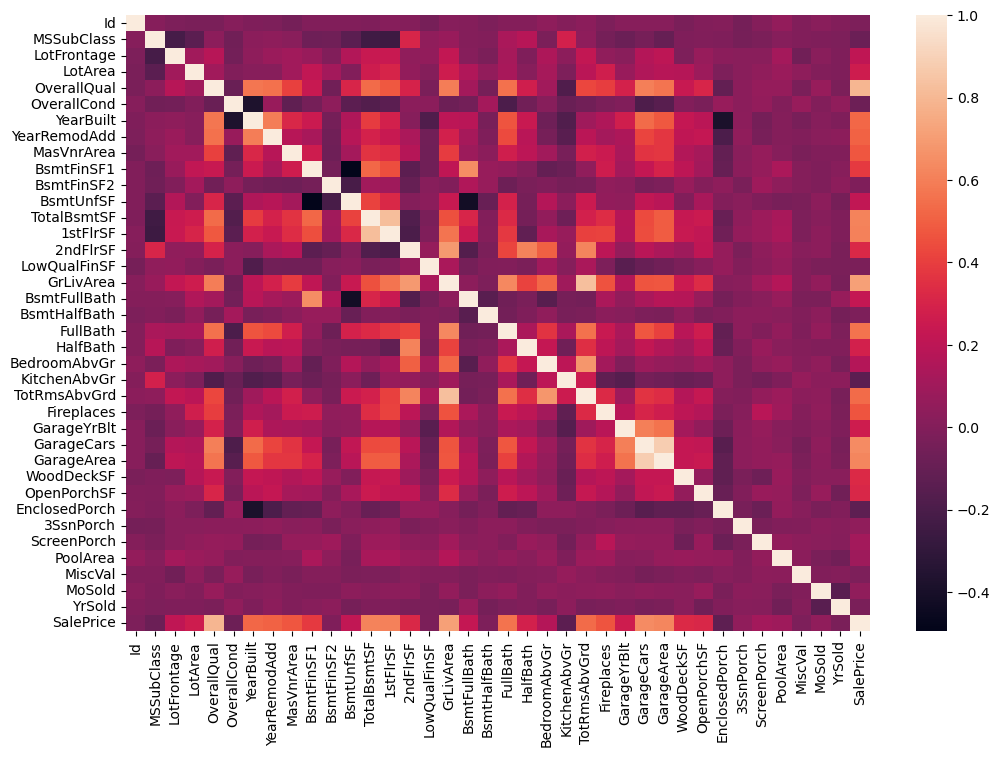

In [13]:
# Corelation Matrix
corr = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr)

In [14]:
# Corelation Values for "SalePrice"
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [15]:
# Select Top 10 Relevent Features
train_col = corr["SalePrice"].sort_values(ascending=False).head(11).index
train_col =list(train_col)

In [16]:
# Explore Test Data 1
train_10 = train[train_col]
train_10.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


In [17]:
# Explore Test Data 2
train_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   GrLivArea     1460 non-null   int64
 3   GarageCars    1460 non-null   int64
 4   GarageArea    1460 non-null   int64
 5   TotalBsmtSF   1460 non-null   int64
 6   1stFlrSF      1460 non-null   int64
 7   FullBath      1460 non-null   int64
 8   TotRmsAbvGrd  1460 non-null   int64
 9   YearBuilt     1460 non-null   int64
 10  YearRemodAdd  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [18]:
# Explore Test Data 3
train_10.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0


<Axes: >

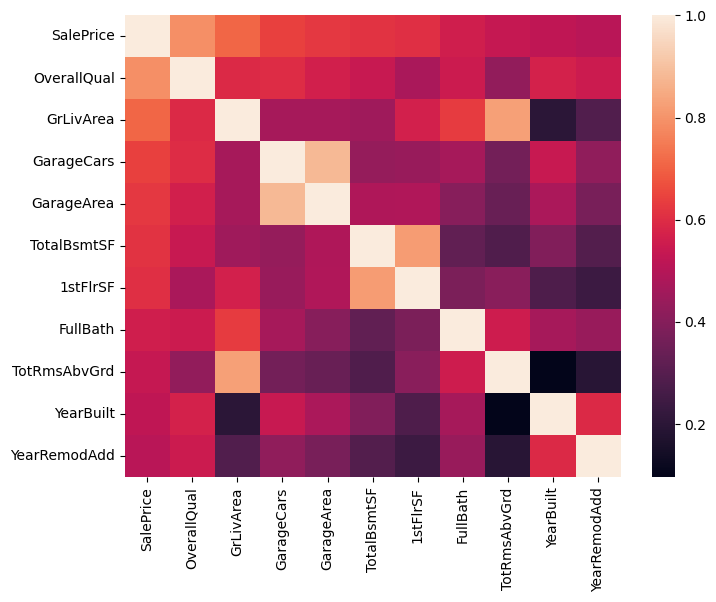

In [19]:
# Corelation Matrix for Train
corr_10 = train_10.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_10)

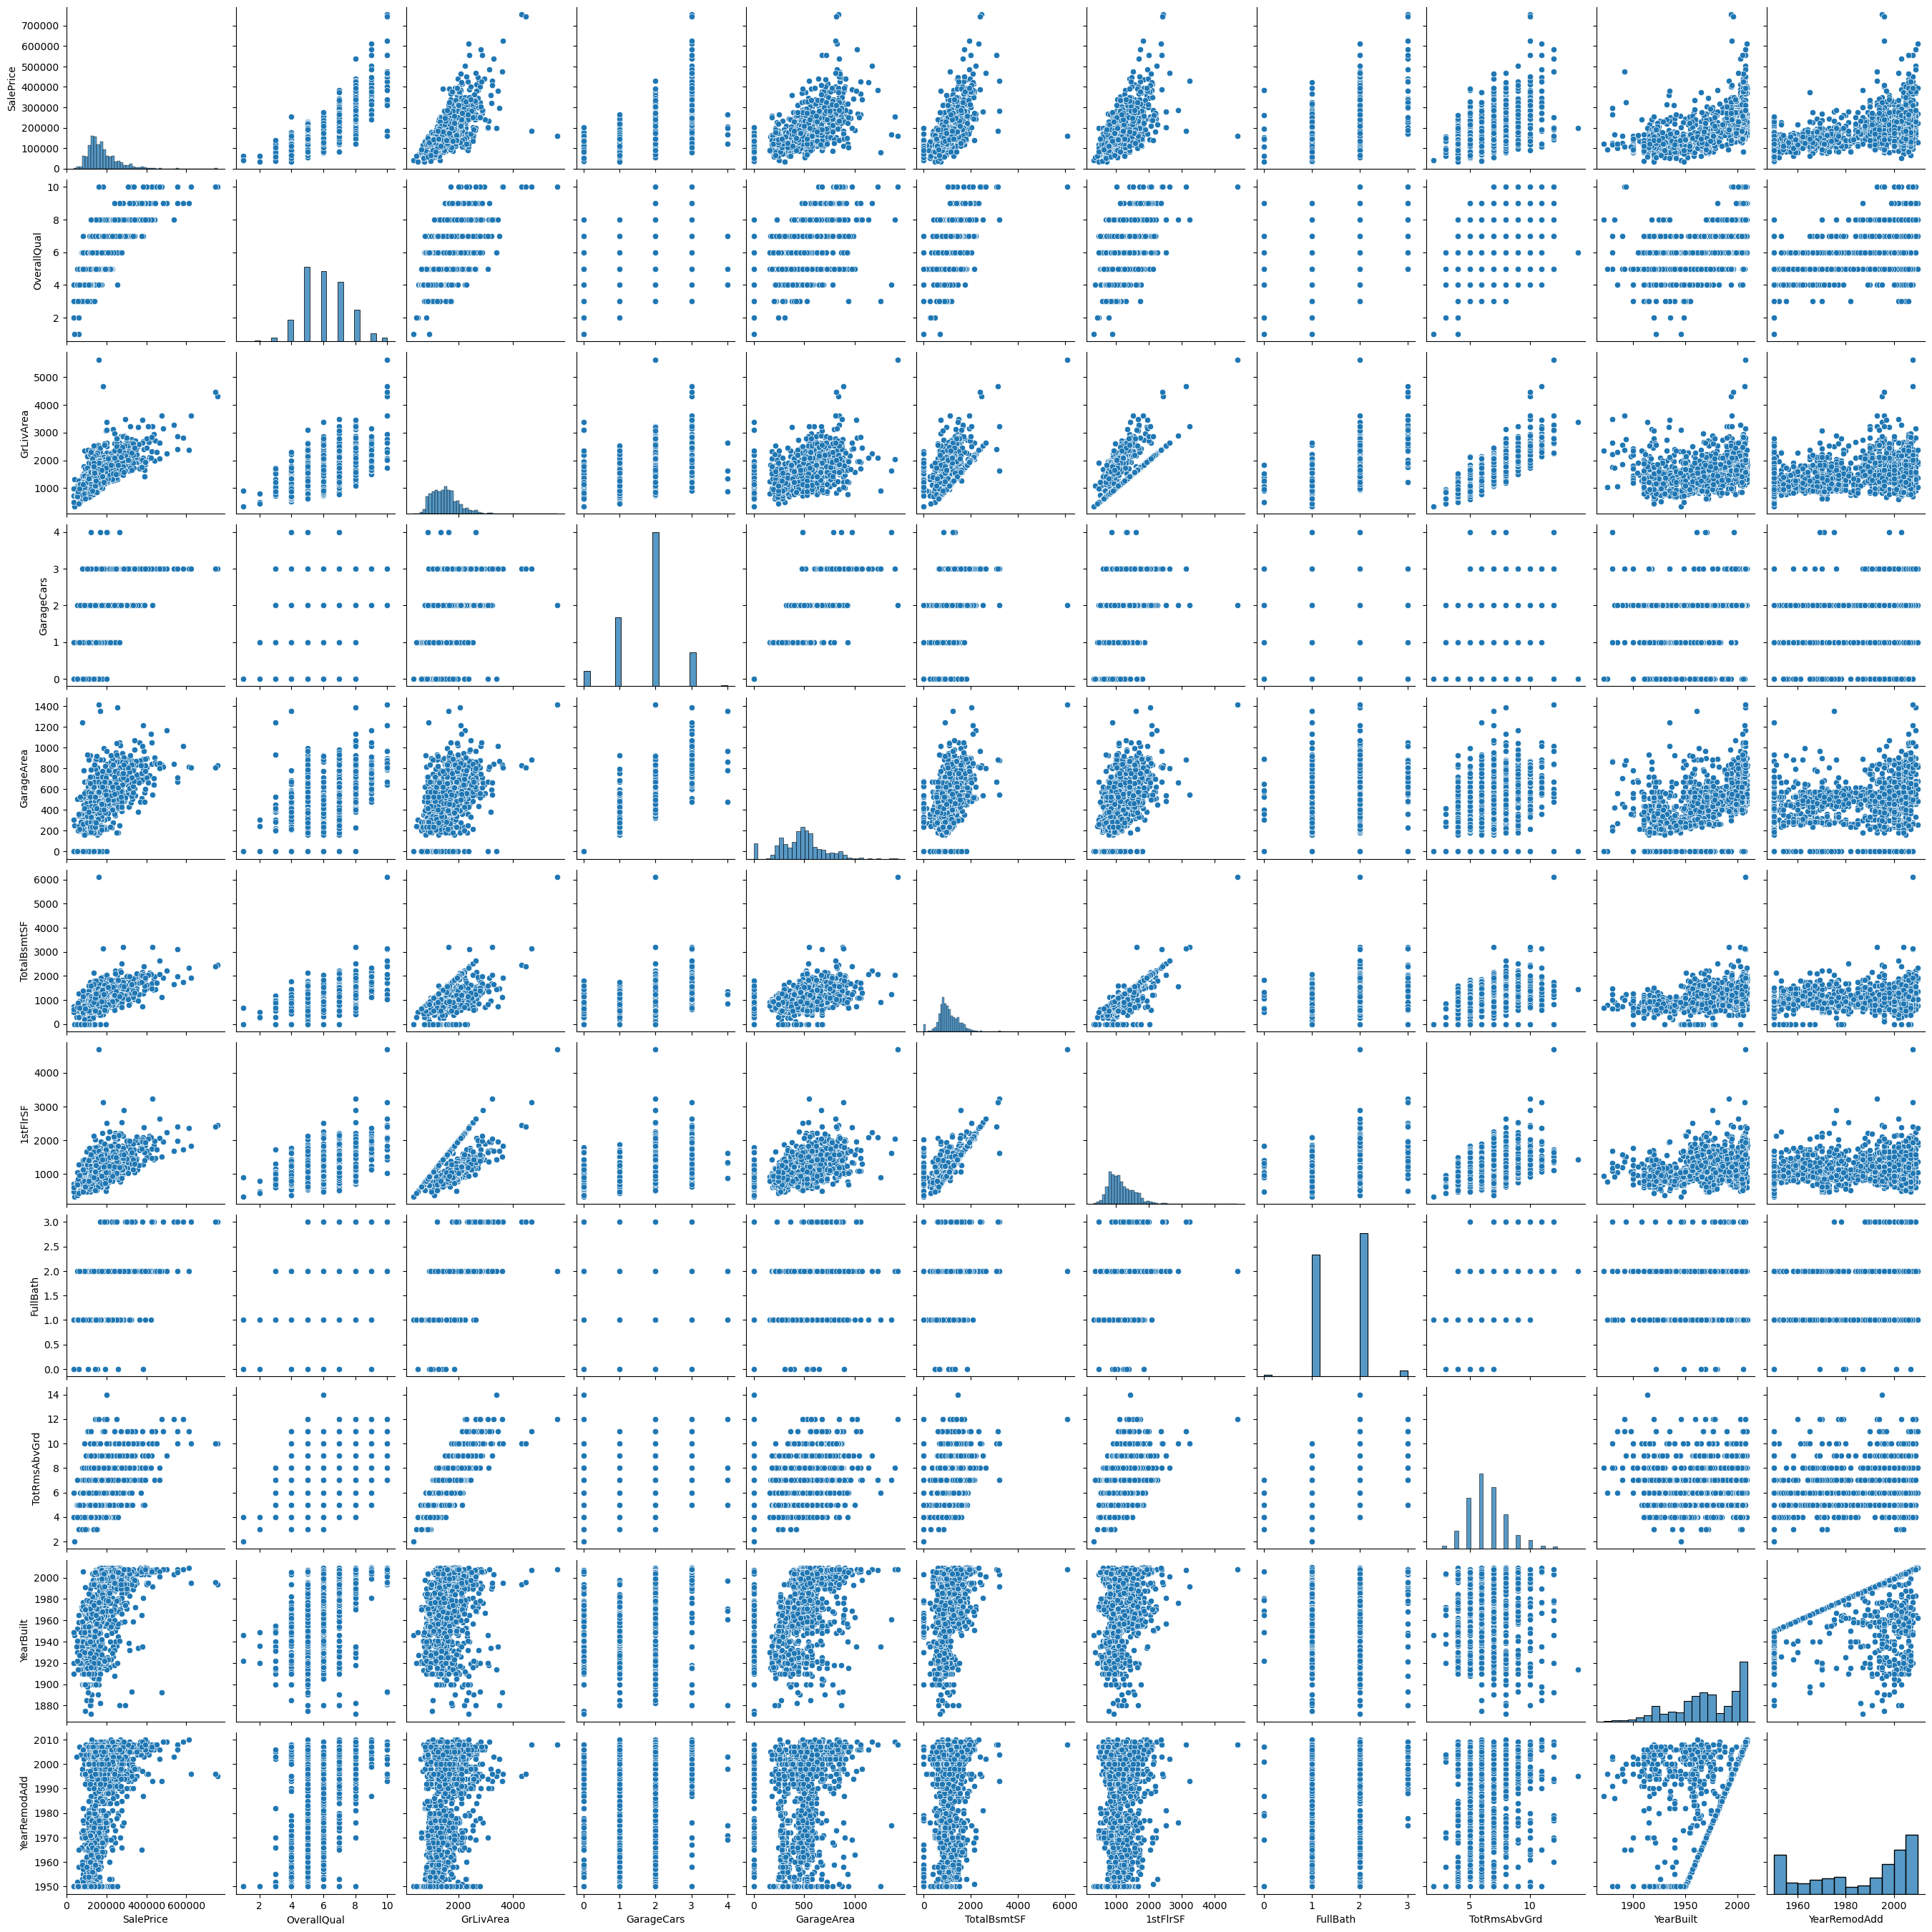

In [20]:
# Explore Features Pairwise
sns.pairplot(train_10)

### Explore Numeric Data and Hanlde Outliars (Even if other features are numeric, they are categorical features) 

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

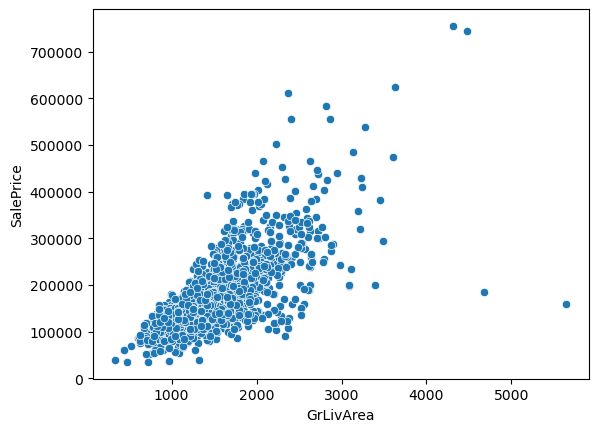

In [21]:
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train_10)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

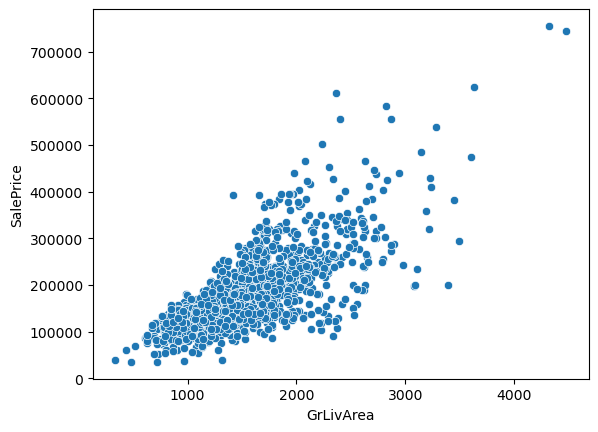

In [22]:
GrLivArea_outliers = train_10[(train_10["GrLivArea"] > 4000) & (train_10["SalePrice"] < 300000)].index
train_10.drop(GrLivArea_outliers, inplace=True)

sns.scatterplot(x="GrLivArea", y="SalePrice", data=train_10)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

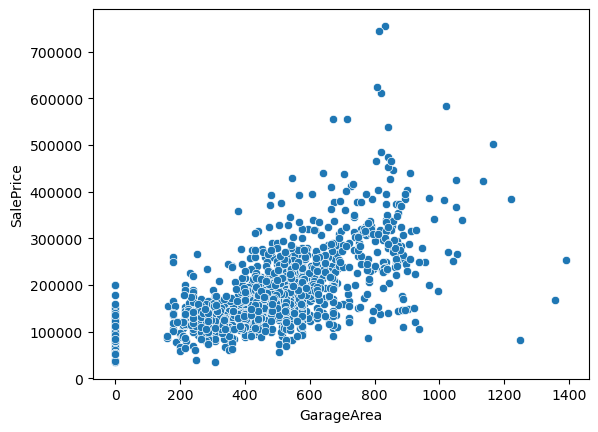

In [23]:
sns.scatterplot(x="GarageArea", y="SalePrice", data=train_10)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

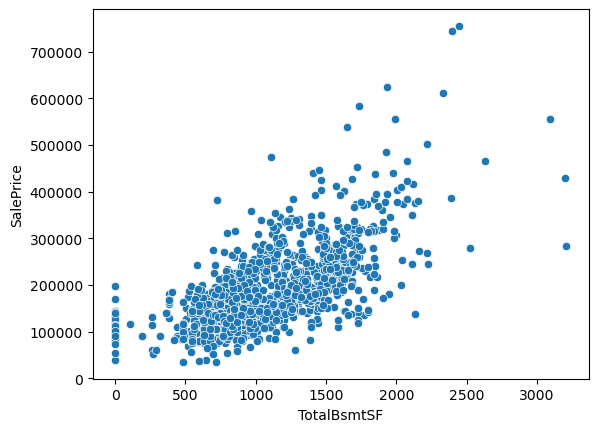

In [24]:
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=train_10)

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

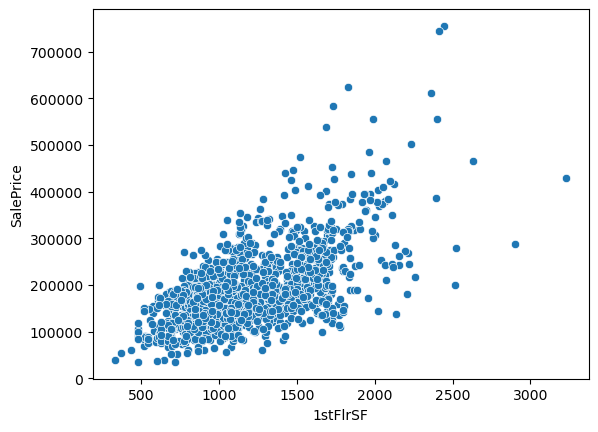

In [25]:
sns.scatterplot(x="1stFlrSF", y="SalePrice", data=train_10)

### Covert Numerical Data to Logarithmic Scale

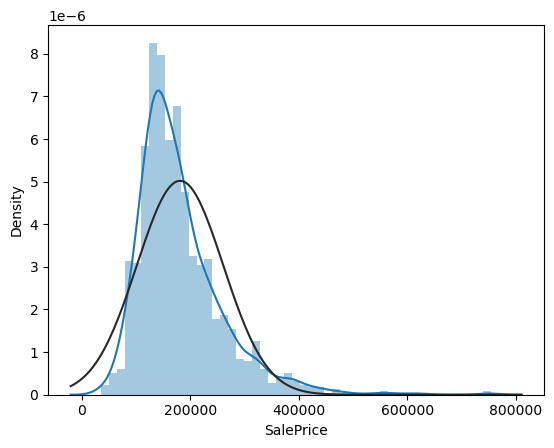

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

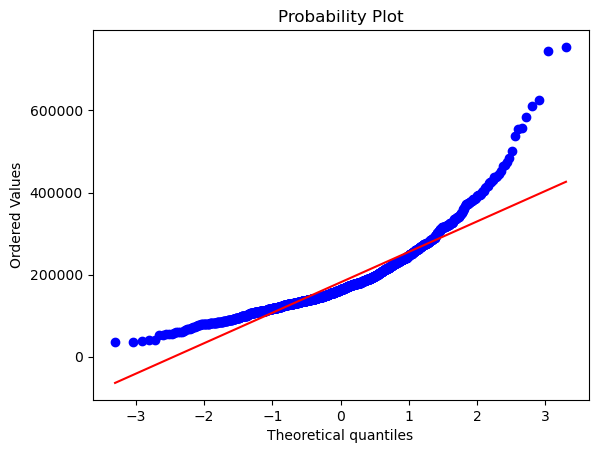

In [26]:
sns.distplot(train_10["SalePrice"], fit=stats.norm)
plt.show()
stats.probplot(train_10["SalePrice"], plot=plt)

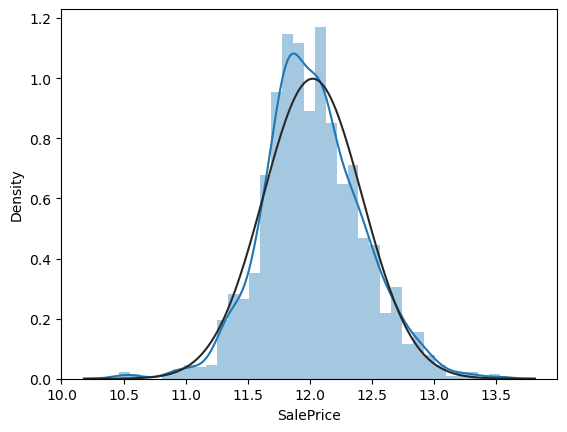

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3985320692976512, 12.024008660964794, 0.9953918648311367))

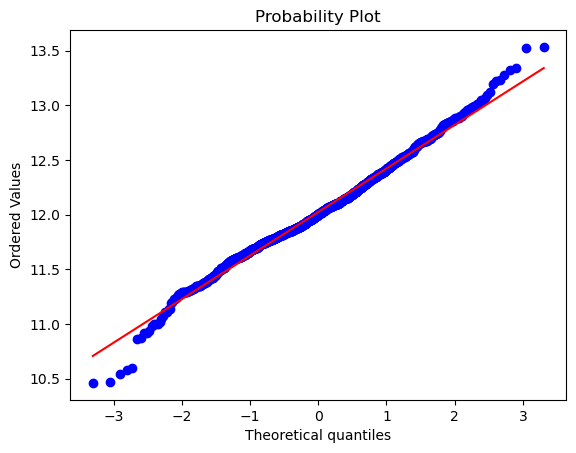

In [27]:
train_10["SalePrice"] = np.log(train_10["SalePrice"])
sns.distplot(train_10["SalePrice"], fit=stats.norm)
plt.show()
stats.probplot(train_10["SalePrice"], plot=plt)

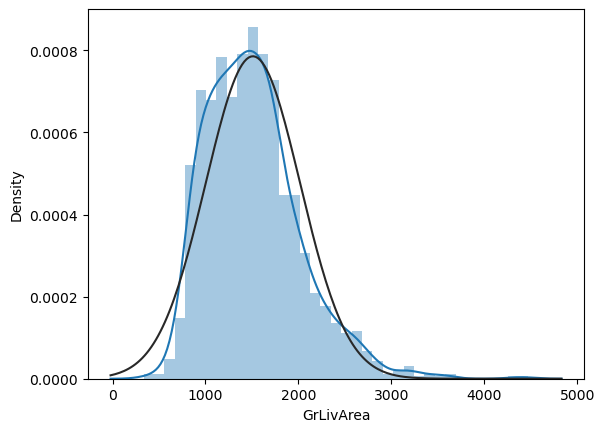

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 334,  438,  480, ..., 3627, 4316, 4476], dtype=int64)),
 (495.6942381740366, 1510.465706447188, 0.9743965913979765))

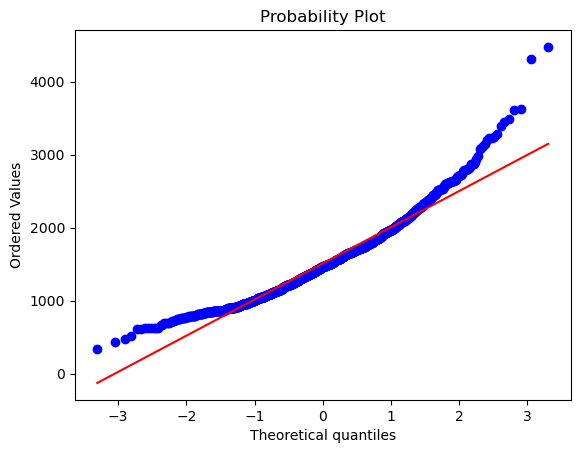

In [28]:
sns.distplot(train_10["GrLivArea"], fit=stats.norm)
plt.show()
stats.probplot(train_10["GrLivArea"], plot=plt)

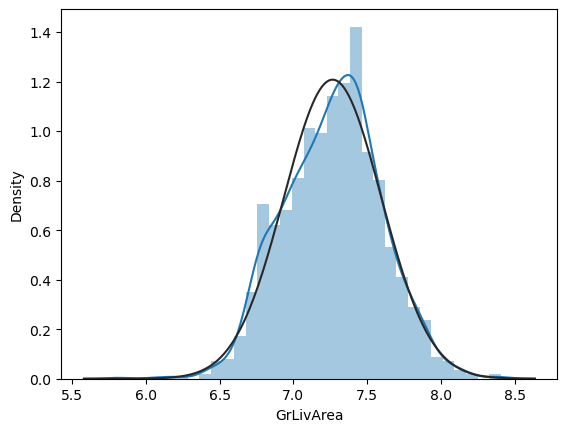

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.19616114, 8.37008433,
         8.40648507])),
 (0.3303181178085236, 7.266023599053438, 0.9981312413733029))

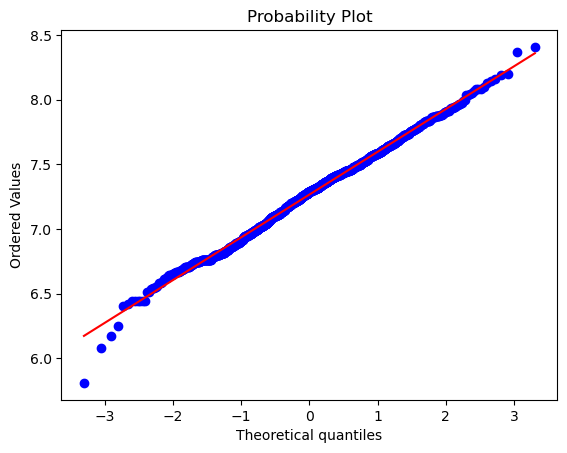

In [29]:
train_10["GrLivArea"] = np.log(train_10["GrLivArea"])
sns.distplot(train_10["GrLivArea"], fit=stats.norm)
plt.show()
stats.probplot(train_10["GrLivArea"], plot=plt)

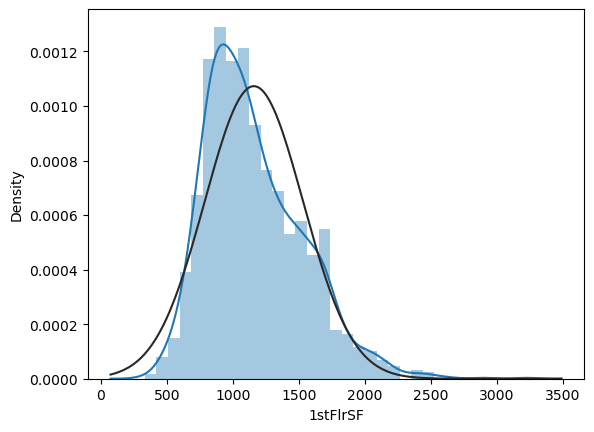

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 334,  372,  438, ..., 2633, 2898, 3228], dtype=int64)),
 (363.8266483622938, 1158.8511659807957, 0.9763087364823069))

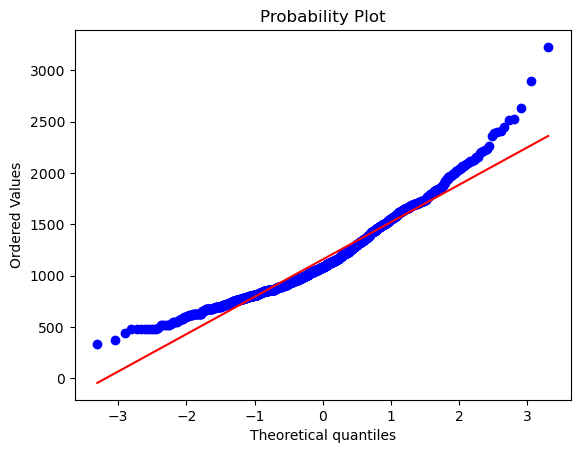

In [30]:
sns.distplot(train_10["1stFlrSF"], fit=stats.norm)
plt.show()
stats.probplot(train_10["1stFlrSF"], plot=plt)

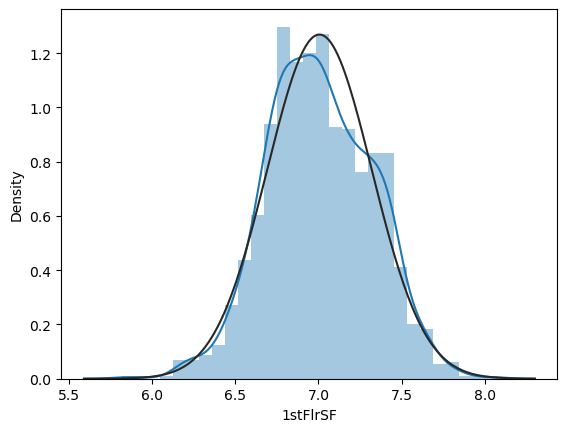

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([5.81114099, 5.91889385, 6.08221891, ..., 7.87587916, 7.97177612,
         8.07961803])),
 (0.3144206676625316, 7.0057936587635385, 0.9981224382069651))

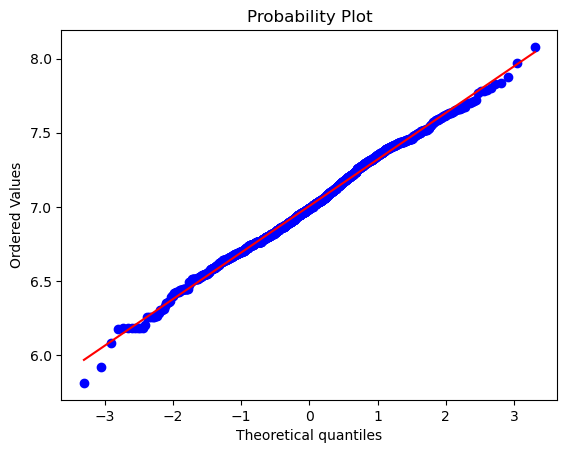

In [31]:
train_10["1stFlrSF"] = np.log(train_10["1stFlrSF"])
sns.distplot(train_10["1stFlrSF"], fit=stats.norm)
plt.show()
stats.probplot(train_10["1stFlrSF"], plot=plt)

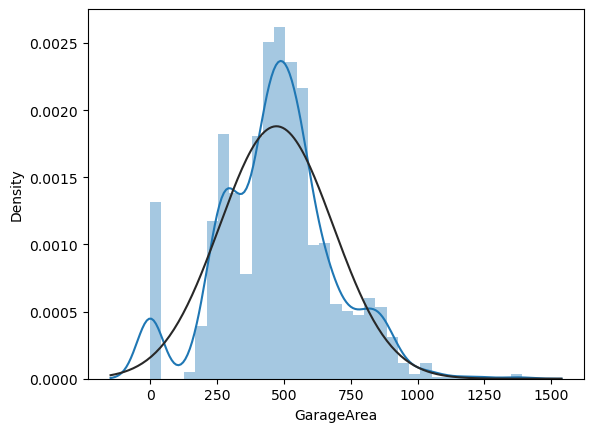

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([   0,    0,    0, ..., 1248, 1356, 1390], dtype=int64)),
 (210.1254457576108, 472.05006858710567, 0.9884043973811356))

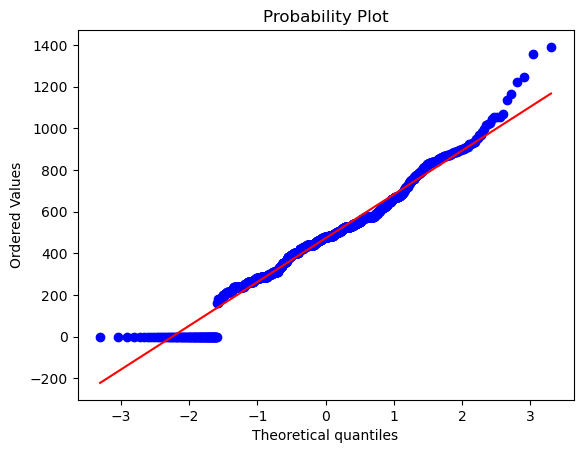

In [32]:
sns.distplot(train_10["GarageArea"], fit=stats.norm)
plt.show()
stats.probplot(train_10["GarageArea"], plot=plt)

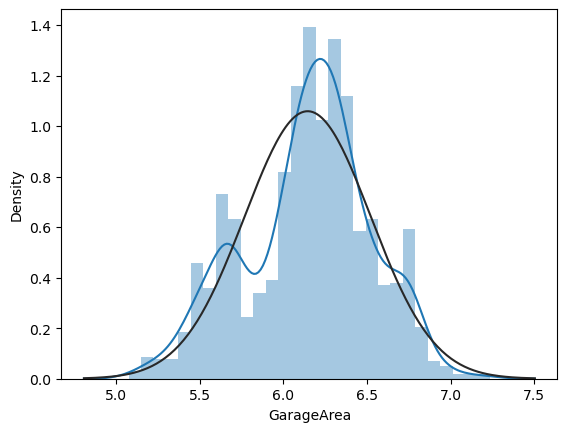

((array([-3.2887045 , -3.03030478, -2.88653303, ...,  2.88653303,
          3.03030478,  3.2887045 ]),
  array([5.07517382, 5.07517382, 5.09986643, ..., 7.12929755, 7.21229447,
         7.23705903])),
 (0.3747987728662475, 6.145747650727747, 0.992536867140929))

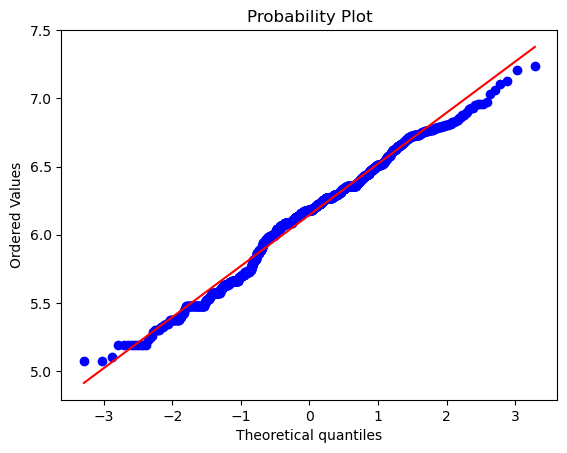

In [33]:
train_10.loc[train_10["GarageArea"]==0,"GarageArea"] = 1
train_10["GarageArea"] = np.log(train_10["GarageArea"])
sns.distplot(train_10.loc[train_10["GarageArea"]>0,"GarageArea"], fit=stats.norm)
plt.show()
stats.probplot(train_10.loc[train_10["GarageArea"]>0,"GarageArea"], plot=plt)

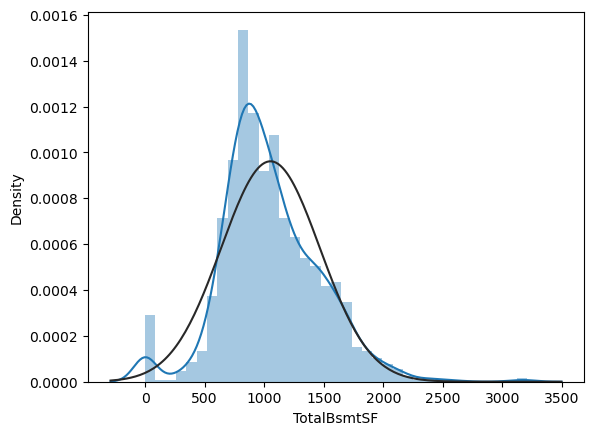

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([   0,    0,    0, ..., 3094, 3200, 3206], dtype=int64)),
 (408.3043535992524, 1052.537037037037, 0.9822818887180168))

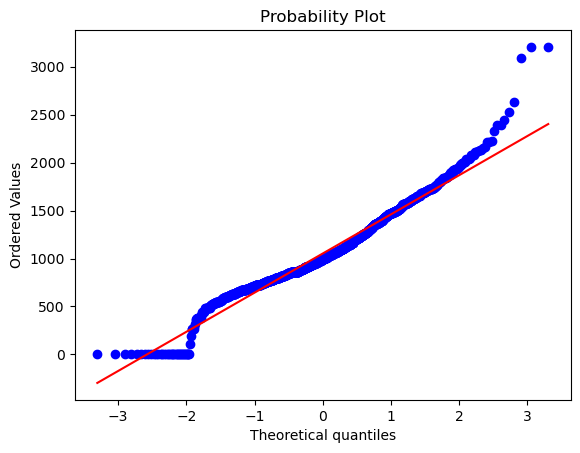

In [34]:
sns.distplot(train_10["TotalBsmtSF"], fit=stats.norm)
plt.show()
stats.probplot(train_10["TotalBsmtSF"], plot=plt)

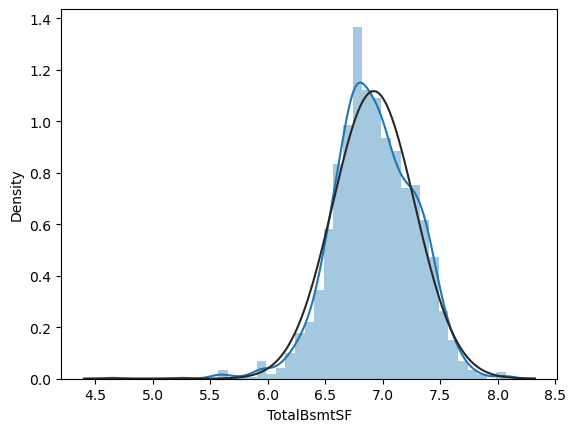

((array([-3.2975455 , -3.0397886 , -2.89641401, ...,  2.89641401,
          3.0397886 ,  3.2975455 ]),
  array([4.65396035, 5.24702407, 5.5759491 , ..., 8.03722003, 8.07090609,
         8.07277933])),
 (0.3546703033082407, 6.922977122505445, 0.9912459010566835))

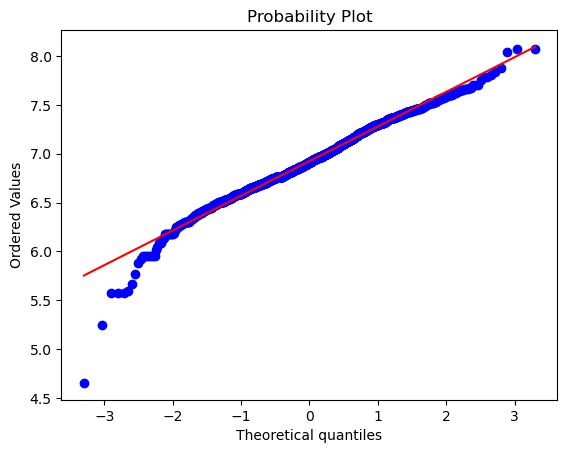

In [35]:
train_10.loc[train_10["TotalBsmtSF"]==0,"TotalBsmtSF"] = 1
train_10["TotalBsmtSF"] = np.log(train_10["TotalBsmtSF"])
sns.distplot(train_10.loc[train_10["TotalBsmtSF"]>0,"TotalBsmtSF"], fit=stats.norm)
plt.show()
stats.probplot(train_10.loc[train_10["TotalBsmtSF"]>0,"TotalBsmtSF"], plot=plt)

In [36]:
# Final Train Data
train_10.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,12.247694,7,7.444249,2,6.306275,6.752270,6.752270,2,8,2003,2003
1,12.109011,6,7.140453,2,6.131226,7.140453,7.140453,2,6,1976,1976
2,12.317167,7,7.487734,2,6.410175,6.824374,6.824374,2,6,2001,2002
3,11.849398,7,7.448334,3,6.464588,6.628041,6.867974,1,7,1915,1970
4,12.429216,8,7.695303,3,6.728629,7.043160,7.043160,2,9,2000,2000


### Apply the Same Procedure for Test Data

In [37]:
test_col = train_col[1:]
test_10 = test[test_col]
test_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   GarageArea    1458 non-null   float64
 4   TotalBsmtSF   1458 non-null   float64
 5   1stFlrSF      1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   YearBuilt     1459 non-null   int64  
 9   YearRemodAdd  1459 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


In [38]:
test_10.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OverallQual,1459.0,6.078821,1.436812,1.0,5.0,6.0,7.0,10.0
GrLivArea,1459.0,1486.045922,485.566099,407.0,1117.5,1432.0,1721.0,5095.0
GarageCars,1458.0,1.766118,0.775945,0.0,1.0,2.0,2.0,5.0
GarageArea,1458.0,472.768861,217.048611,0.0,318.0,480.0,576.0,1488.0
TotalBsmtSF,1458.0,1046.117970,442.898624,0.0,784.0,988.0,1305.0,5095.0
1stFlrSF,1459.0,1156.534613,398.165820,407.0,873.5,1079.0,1382.5,5095.0
FullBath,1459.0,1.570939,0.555190,0.0,1.0,2.0,2.0,4.0
TotRmsAbvGrd,1459.0,6.385195,1.508895,3.0,5.0,6.0,7.0,15.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.0,1973.0,2001.0,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.0,1992.0,2004.0,2010.0


In [39]:
test_10["GarageCars"] = test_10["GarageCars"].fillna(0)
test_10["GarageArea"] = test_10["GarageArea"].fillna(0)
test_10["TotalBsmtSF"] = test_10["TotalBsmtSF"].fillna(test_10["TotalBsmtSF"].mean())

test_10["GrLivArea"] = np.log(test_10["GrLivArea"])
test_10["1stFlrSF"] = np.log(test_10["1stFlrSF"])
test_10.loc[test_10["GarageArea"]==0,"GarageArea"] = 1
test_10["GarageArea"] = np.log(test_10["GarageArea"])
test_10.loc[test_10["TotalBsmtSF"]==0,"TotalBsmtSF"] = 1
test_10["TotalBsmtSF"] = np.log(test_10["TotalBsmtSF"])

In [40]:
# Final Test Data
test_10.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,5,6.797940,1.0,6.593045,6.782192,6.797940,1,5,1961,1961
1,6,7.192182,1.0,5.743003,7.192182,7.192182,1,6,1958,1958
2,5,7.395722,2.0,6.177944,6.833032,6.833032,2,6,1997,1998
3,6,7.380256,2.0,6.152733,6.830874,6.830874,2,7,1998,1998
4,8,7.154615,2.0,6.226537,7.154615,7.154615,2,5,1992,1992


# Expetimentation & Prediction

In [41]:
# Import Libraries for Expetimentation & Prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Validation with Train Data

In [42]:
# Create Target Feature
X = train_10.drop(columns=["SalePrice"])
y = train_10["SalePrice"]

In [43]:
# Separate Train and Test Set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [44]:
# Train Linear Regression Model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [45]:
# Check Coefficients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,0.096284
GrLivArea,0.423858
GarageCars,0.042463
GarageArea,0.015010
TotalBsmtSF,0.029510
1stFlrSF,0.214769
FullBath,-0.028212
TotRmsAbvGrd,-0.004705
YearBuilt,0.002190
YearRemodAdd,0.001815


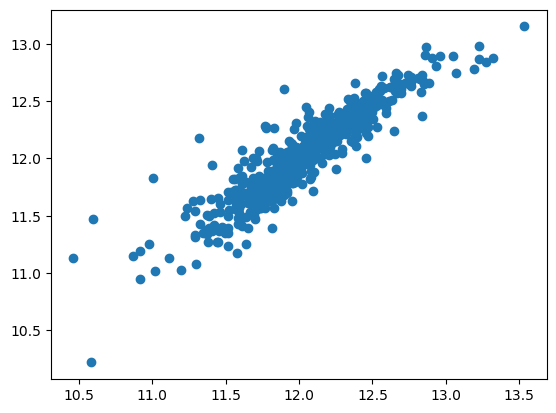

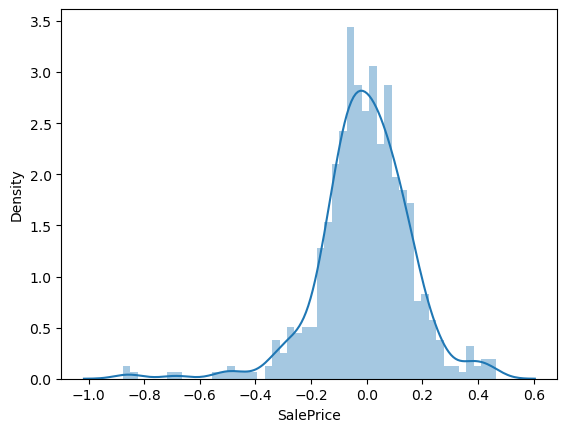

In [46]:
# Plot Prediction and Actual Values
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.show()
sns.distplot((y_test-predictions),bins=50);

In [47]:
# Test Results
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.11906919843430104
MSE: 0.02747284568772308
RMSE: 0.16574934596469176


# Submission

In [48]:
# Fit Machine Learning Model
lm_final = LinearRegression()
lm.fit(train_10.drop(columns=["SalePrice"]),train_10["SalePrice"])

LinearRegression()

In [49]:
# Predict with Machine Learning Model
predictions_final = lm.predict(test_10)
predictions_final = np.expm1(predictions_final)
predictions_final = pd.DataFrame(predictions_final, columns=["SalePrice"])
predictions_final

,SalePrice
0,109654.938335
1,151546.851042
2,167396.233411
3,182666.959285
4,210434.225528
...,...
1454,88602.949339
1455,99362.589601
1456,151027.275028
1457,116110.045088


In [50]:
# Create Submission Dataframe
submission = pd.DataFrame()
submission["Id"] = test["Id"]
submission["SalePrice"] = predictions_final
submission

,Id,SalePrice
0,1461,109654.938335
1,1462,151546.851042
2,1463,167396.233411
3,1464,182666.959285
4,1465,210434.225528
...,...,...
1454,2915,88602.949339
1455,2916,99362.589601
1456,2917,151027.275028
1457,2918,116110.045088


In [51]:
# Write Submission Dataframe
submission.to_csv('submission.csv',index=False)